# Machine Learning Pipeline for IP Activity Dataset using Random Forest for Feature Selection

## Introduction
In this script, I explore and analyze an IP Activity dataset, implementing a machine learning pipeline using RandomForestClassifier for binary classification. The code includes data loading, preprocessing, model training, feature importance analysis, and hyperparameter tuning.

## Libraries and Data Loading
Firstly, I import essential libraries such as:

- `pandas` and `numpy` for data manipulation.
- `matplotlib` and `seaborn` for data visualization.
- `sklearn` for machine learning models and metrics.
- `torch` and its submodules for potential deep learning applications.

I load the dataset 'IP_Activity_Dataset_5000.csv' and display its basic structure, including the number of observations, variables, and class distribution in the 'label' column.

## Data Preprocessing
I split the dataset into features (`X`) and labels (`y`), then perform a stratified split into training and test sets with a 50-50 ratio. Stratified splitting ensures that both sets have a similar distribution of classes. 

I standardize the features using `StandardScaler` to normalize the data, improving model performance.

## Initial RandomForest Model
I train a RandomForestClassifier with specific hyperparameters (5 trees and max depth of 5) and time the training process. After predicting on the test set, I calculate and print the accuracy, F1-score, confusion matrix, and execution time.

## Feature Importance and Selection
Using a second RandomForest model with different hyperparameters (10 trees and max depth of 10), I determine the feature importances. I plot these importances and select features that cumulatively contribute to 90% of the importance.

## Refined Model with Selected Features
I retrain the RandomForest model on the reduced feature set, again recording its performance in terms of accuracy, F1-score, confusion matrix, and execution time. 

## Hyperparameter Tuning using GridSearchCV
I employ `GridSearchCV` to find optimal hyperparameters for the RandomForest model. I use a parameter grid with two options for the number of trees and max depth, perform cross-validation, and time this process. I print the best parameters and the best cross-validation score.

## Final Model Training with Optimal Hyperparameters
Using the optimal parameters found (10 trees and max depth of 10), I train the final RandomForest model on the selected features. I then evaluate and print its performance metrics (accuracy, F1-score, confusion matrix) and execution time.

## Summary
This script showcases a thorough approach to binary classification using RandomForestClassifier. It covers data preprocessing, model training, feature importance analysis, and hyperparameter tuning. The use of stratified splitting and standardization ensures robust data handling, while GridSearchCV aids in finding the most effective model settings.


In [1]:
##IMPORTS
import matplotlib.pyplot as plt 
%matplotlib inline

import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score

import time
import random

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset





In [2]:

df = pd.read_csv("IP_Activity_Dataset_5000.csv")
print("# of observations:", len(df))
print("# of variables:", df.shape[1])
print("Observations for each class in 'label':\n", df['label'].value_counts())
nn = df.shape[1]
print(df.head())

# of observations: 5000
# of variables: 9
Observations for each class in 'label':
 0    4500
1     500
Name: label, dtype: int64
   requests  request-interval  request-popularity        bytes  delivery-time  \
0        18        378.605278            1.000000    29.667209      38.833333   
1         5          0.524200            1.000000    19.226953     204.600000   
2      1141         66.912231            0.167647    19.847204     142.072963   
3        80          2.472875            0.418750  1769.312634    1330.787500   
4         1          0.000000            1.000000     0.000000       2.000000   

   hit-rate  nodes  contents  label  
0  0.888889      2         9      0  
1  1.000000      1         5      0  
2  0.021520      5       703      1  
3  1.000000      2        76      0  
4  1.000000      1         1      0  


In [3]:

X = df.drop('label', axis=1)
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

In [4]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:

rf = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=42)

start_time = time.time()

rf.fit(X_train, y_train)

end_time = time.time()


y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

confusion = confusion_matrix(y_test, y_pred)
exce = end_time - start_time

print("Accuracy:", accuracy)
print("\nF1-score:", f1)
print("\nConfusion matrix:\n", confusion)
print("\nExecution time:", exce)

Accuracy: 0.9916

F1-score: 0.9568788501026694

Confusion matrix:
 [[2246    4]
 [  17  233]]

Execution time: 0.024991750717163086


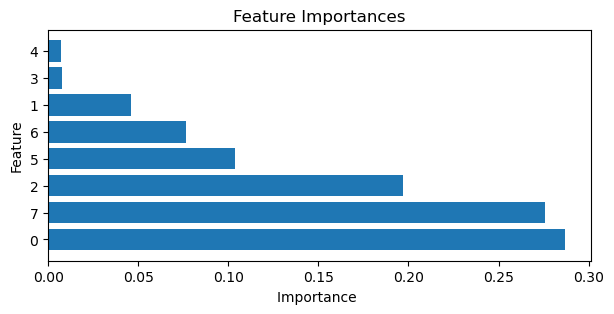

Selected features and their importance scores:

Feature 0: 0.2867621039330823
Feature 7: 0.2755034561832739
Feature 2: 0.19684897744187677
Feature 5: 0.10369793421813603

Accuracy: 0.9948

F1-score: 0.9738430583501007

Confusion matrix:
 [[2245    5]
 [   8  242]]

Time Execution: 0.014729976654052734


In [6]:



rf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)

rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
cum_important = np.cumsum(importances[indices])
selected_features = [feature for feature, cumulative_importance in zip(indices, cum_important) if cumulative_importance <= 0.9]
rf.feature_names_in_ = [df.columns[i] for i in range(X_train.shape[1])]


plt.figure(figsize=(7, 3))
plt.barh(range(X_train.shape[1]), importances[indices], )
plt.yticks(range(X_train.shape[1]), indices)
plt.xlabel('Importance ')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


print("Selected features and their importance scores:\n")
for rf.feature_names_in_ in selected_features:
    print(f"Feature {rf.feature_names_in_}: {importances[rf.feature_names_in_]}")


Xtrain_sel = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]


start_time = time.time()
rf.fit(Xtrain_sel, y_train)
end_time = time.time()


y_pred = rf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
execution_time = end_time - start_time

print("\nAccuracy:", accuracy)
print("\nF1-score:", f1)
print("\nConfusion matrix:\n", confusion)
print("\nTime Execution:", execution_time)

In [7]:

param_grid = {'n_estimators': [10, 20], 'max_depth': [10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
start_time = time.time()
grid_search.fit(Xtrain_sel, y_train)
end_time = time.time()


print("Optimal hyperparameters:", grid_search.best_params_)
print("Optimal cross-validation score:", grid_search.best_score_)

# after runnning line abouve, found that best params are n_estimators=10, max_depth=10
rf_best = RandomForestClassifier(n_estimators=10,max_depth=10, random_state=42)
rf_best.fit(Xtrain_sel, y_train)


y_pred = rf_best.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
execution_time = end_time - start_time

print("\nAccuracy:", accuracy)
print("\nF1-score:", f1)
print("\nConfusion matrix:\n", confusion)
print("\nExecution time:", execution_time)

Optimal hyperparameters: {'max_depth': 10, 'n_estimators': 10}
Optimal cross-validation score: 0.9963990392319997

Accuracy: 0.9948

F1-score: 0.9738430583501007

Confusion matrix:
 [[2245    5]
 [   8  242]]

Execution time: 0.2546350955963135
